In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
xtrainDf = pd.read_csv("Training Data/xTrain.csv")
ytrainDf = pd.read_csv("Training Data/yTrain.csv")
print(xtrainDf.head())

         f1        f2        f3
0 -1.239375  0.749101 -0.528515
1 -1.036070  0.801436 -1.283712
2 -0.615579  1.579521 -1.391927
3  1.335978  1.348651  1.433564
4  0.658925  1.300019  0.571603


In [9]:
xtrain = xtrainDf.values
ytrain = ytrainDf.values
print(xtrain.shape)
print(ytrain.shape)

(3000, 3)
(3000, 1)


In [10]:
ones = np.ones((xtrain.shape[0], 1))
xtrain = np.hstack((ones, xtrain))
xtrain

array([[ 1.        , -1.23937466,  0.74910149, -0.52851491],
       [ 1.        , -1.03607028,  0.80143631, -1.28371152],
       [ 1.        , -0.61557914,  1.57952053, -1.39192706],
       ...,
       [ 1.        ,  0.08827657,  1.63878904, -2.19364056],
       [ 1.        ,  1.52515501,  0.85923429,  1.50530791],
       [ 1.        , -0.97981744,  0.56395376, -1.53939416]])

In [24]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
    
def hypothesis(X, theta):
    y_ = sigmoid(np.dot(X, theta))
    return y_.reshape((-1, 1))

def error(X, Y, theta):
    y_ = hypothesis(X, theta)
    L = -np.mean(Y * np.log(y_) + (1 - Y) * np.log(1 - y_))
    return L

def gradient(X, Y, theta):
    y_ = hypothesis(X, theta)
    grad = -np.dot(X.T, (Y - y_))
    return grad / X.shape[0]

def gradientDescent(X, Y, alpha = 0.1, maxIters = 300):
    n = X.shape[1]
    theta = np.zeros((n, 1))
    errorlist = []
    for i in range(maxIters):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        errorlist.append(e)
        theta = theta - alpha * grad

    return theta, errorlist


In [27]:
theta, errorlist = gradientDescent(xtrain, ytrain, maxIters=600)
print(theta)

[[-1.3348246 ]
 [-2.02749624]
 [ 1.23163004]
 [-2.17435026]]


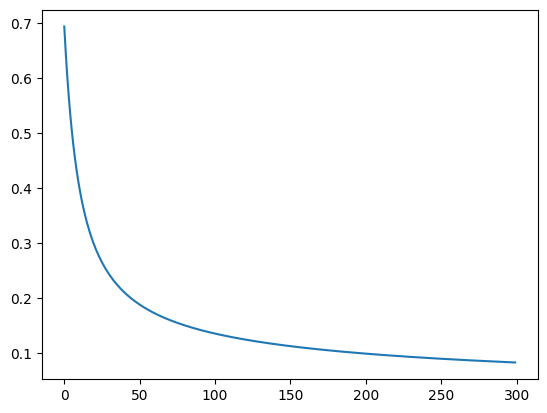

In [26]:
plt.plot(errorlist)
plt.show()

In [28]:
xtestDf = pd.read_csv('Test Cases/xTest.csv')

In [29]:
print(xtestDf.head())

         f1        f2        f3
0 -0.767508 -0.261859 -2.514831
1 -1.241653  1.449001 -0.413089
2  1.925270  1.931761  1.342619
3 -1.298255  1.049761 -0.527319
4 -0.964712  0.938088 -1.186328


In [32]:
xtest = xtestDf.values
ones = np.ones((xtest.shape[0], 1))
print(ones.shape)
xtest = np.hstack((ones, xtest))
print(xtest.shape)

(1000, 1)
(1000, 4)


In [37]:
def predict(X, theta):
    y_ = hypothesis(X, theta)
    output = np.zeros(y_.shape)
    output[y_ >= 0.5] = 1
    return output.astype('int')

In [42]:
y_pred = predict(xtest, theta)
print(y_pred)

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]


In [45]:
y_pred = pd.DataFrame(y_pred, columns=['values'])
y_pred.head()
y_pred.to_csv('Test Cases/y_predicted.csv', index=False)